In [1]:
from scipy import optimize
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt

def calculate_center_lsq(x,y, VERBOSE= True):
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    def f_2(c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    if VERBOSE:
        print("Center / mm: {},{}".format(xc_2*1e3,yc_2*1e3))
        print("Radius / mm: {}".format(R_2*1e3))
        print("Residuum: {}".format(residu_2))

    return {'xc': xc_2, 'yc': yc_2, 'r': R_2, 'residuum': residu_2}

Center / mm: -0.012835666953944112, 0.01302956726072679


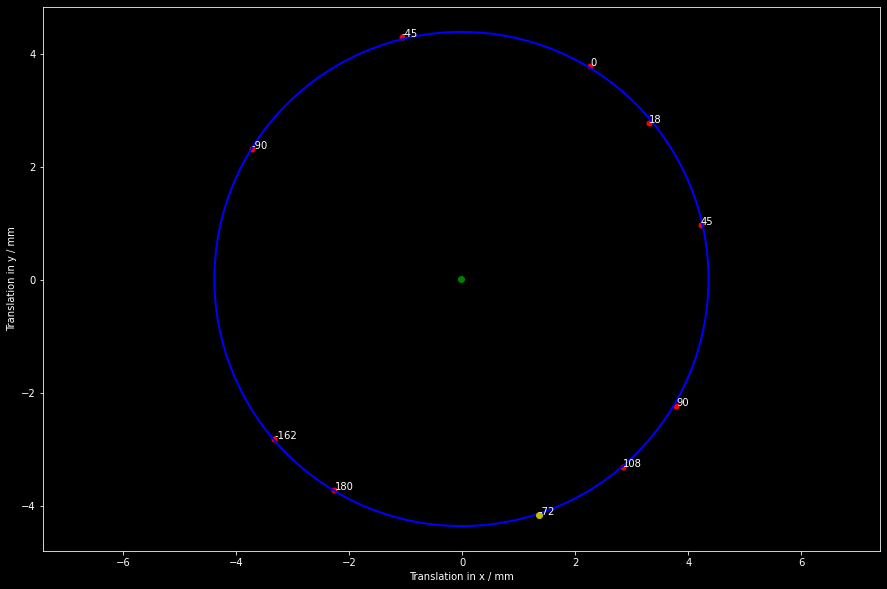

In [2]:


x_test = [3.7821, -3.7195, 2.2640, -2.2600, -3.3271, 3.3103, 2.8408,  4.2165, -1.0722]
y_test = [-2.2328, 2.3071, 3.7821, -3.7274, -2.8135, 2.7697, -3.3138, 0.9637, 4.2885]
phi_test = [90, -90, 0, 180, -162, 18, 108, 45, -45]

result_lsq_test = calculate_center_lsq(x_test, y_test, False)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x_test, y_test,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(phi_test):
    ax.annotate(str(round(txt,1)), (x_test[i], y_test[i]))

ellipse = arc(xy=(result_lsq_test['xc'],result_lsq_test['yc']), width=2*result_lsq_test['r'], height=2*result_lsq_test['r'], angle=np.max(phi_test),
                edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_test['xc'],result_lsq_test['yc'], 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

angle = -72
x_t2, y_t2 = result_lsq_test['r'] * np.cos(np.deg2rad(angle)), result_lsq_test['r'] * np.sin(np.deg2rad(angle))
ax.plot(x_t2, y_t2 , 'yo')
ax.annotate(str(angle), (x_t2, y_t2))

print("Center / mm: {}, {}".format(result_lsq_test['xc'],result_lsq_test['yc']))

plt.show()

fig.savefig("TestPlot.png", format="png")

fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [3]:
zero_angle = [np.arctan(y/x) for x,y in zip(x_test, y_test)]
np.rad2deg(zero_angle)

array([-30.5558966 , -31.81014969,  59.09487117,  58.770697  ,
        40.21890722,  39.91893773, -49.39471871,  12.87407914,
       -75.96281345])

Center / mm: -0.20402617533659292, 1.2362003119675595
Center: -0.00020402617533659293, 0.0012362003119675594
Radius: 0.004387408101290329


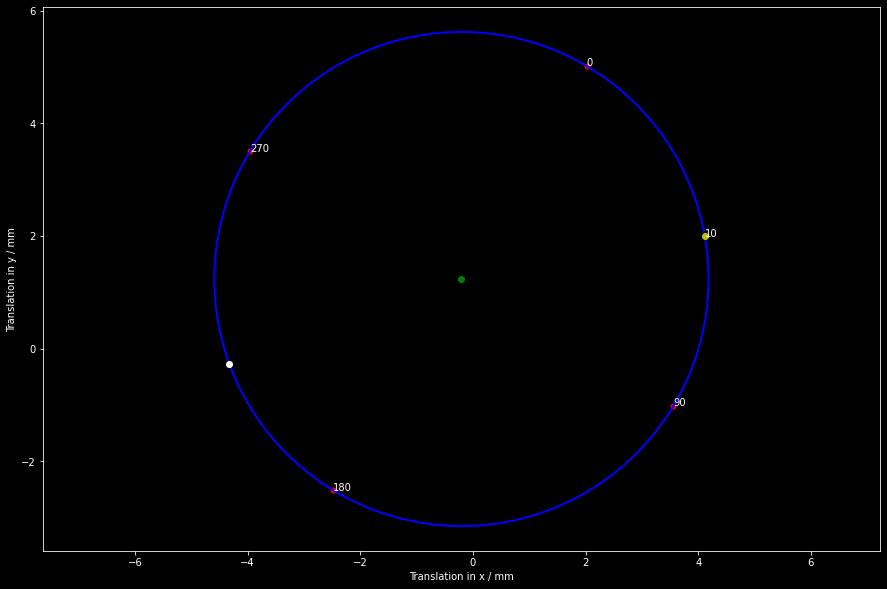

In [4]:
x_script =[0.0020223, 0.003554249, -0.00249183, -0.00395025]
y_script = [0.0050235833, -0.00101633, -0.00251433, 0.003508533]
phi_script = [0 ,90 , 180, 270]

x_script_mm, y_script_mm = [x*1e3 for x in x_script], [y*1e3 for y in y_script]

result_lsq_script = calculate_center_lsq(x_script, y_script, False)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x_script_mm, y_script_mm,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(phi_script):
    ax.annotate(str(round(txt,1)), (x_script_mm[i], y_script_mm[i]))

ellipse = arc(xy=(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3), width=2*result_lsq_script['r']*1e3, height=2*result_lsq_script['r']*1e3,
        angle=np.max(phi_script),edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3, 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

angle = 10
x_t2= result_lsq_script['r']*1e3 * np.cos(np.deg2rad(angle)) + result_lsq_script['xc']*1e3
y_t2 = result_lsq_script['r']*1e3 * np.sin(np.deg2rad(angle)) + result_lsq_script['yc']*1e3

r_new = np.deg2rad(180 + angle)
index = 2
x_mirrored = np.cos(r_new) * (x_t2 - result_lsq_script['xc']*1e3) - (y_t2 - result_lsq_script['yc']*1e3)  * np.sin(r_new) + result_lsq_script['xc']*1e3
y_mirrored = np.sin(r_new) * (x_t2 - result_lsq_script['xc']*1e3) + (y_t2 - result_lsq_script['yc']*1e3)  * np.cos(r_new) + result_lsq_script['yc']*1e3

ax.plot(x_t2, y_t2 , 'yo')
ax.annotate(str(angle), (x_t2, y_t2))

ax.plot(x_mirrored, y_mirrored , 'wo')

print("Center / mm: {}, {}".format(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3))
print("Center: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
print("Radius: {}".format(result_lsq_script['r']))

plt.show()


In [5]:
from pathlib import Path
import csv, math

folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_223858_1.0deg_360_3mm_MovementTestAligned')
file = Path.joinpath(folder, 'position_data.csv')


with open(file, mode='r') as f:
    reader = csv.DictReader(f)
    positions_str = list(reader)


positions = [dict([a, float(x)] for a, x in b.items()) for b in positions_str]
position_angles = [np.rad2deg(float(x['r'])) for x in positions_str]
#print(positions)
print(positions[0])
#for i in range(len(positions)):
#    print(positions[0])
print(positions[0]['r']/math.pi*180 -360)


position_standard = {}
position_standard['x'] = -2.1915e-3
position_standard['y'] = -4.3908e-3
position_standard['z'] = 6.9725e-3
position_standard['t'] = 0.0
position_standard['r'] = 2*math.pi
positions_sorted = sorted(positions, key=lambda d: d['r']) 
#print(positions_sorted)

{'x': 0.001959059527801177, 'y': 0.005051299277471823, 'z': 0.03541303369341564, 'r': -0.017453292519943295, 't': 0.0}
-361.0


{'x': 0.001959059527801177, 'y': 0.005051299277471823, 'z': 0.03541303369341564, 'r': -0.017453292519943295, 't': 0.0}
-361.0
Center / mm: -0.25408000000000003, 1.23574
Center: -0.25408000000000003, 1.23574
Radius: 4.410949916901949


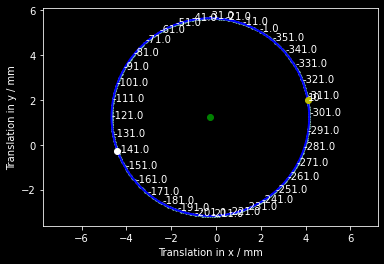

In [6]:
def plot_position_data(file):
    from pathlib import Path
    import csv, math

    with open(file, mode='r') as f:
        reader = csv.DictReader(f)
        positions_str = list(reader)


    positions = [dict([a, float(x)] for a, x in b.items()) for b in positions_str]
    position_angles = [np.rad2deg(float(x['r'])) for x in positions_str]
    #print(positions)
    print(positions[0])
    #for i in range(len(positions)):
    #    print(positions[0])
    print(positions[0]['r']/math.pi*180 -360)
    x_script_mm, y_script_mm, angles_file = [p['x']*1e3 for p in positions],[p['y']*1e3 for p in positions], [np.rad2deg(p['r']) for p in positions]

    result_lsq_script = calculate_center_lsq(x_script_mm, y_script_mm, False)

    from ctypes import resize
    from operator import mod
    from matplotlib.patches import Arc as arc
    #%matplotlib widget

    plt.style.use('dark_background')
    fig, ax = plt.subplots()

    ax.scatter(x_script_mm, y_script_mm,2 )
    for i, txt in enumerate(angles_file):
        if i % 10 == 0:
            ax.annotate(str(round(angles_file[i],1)), (x_script_mm[i], y_script_mm[i]))

    ellipse = arc(xy=(result_lsq_script['xc'],result_lsq_script['yc']), width=2*result_lsq_script['r'], height=2*result_lsq_script['r'],
            angle=np.max(phi_script),edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
    ax.add_patch(ellipse)

    ax.plot(result_lsq_script['xc'],result_lsq_script['yc'], 'go')
    ax.set_xlabel('Translation in x / mm')
    ax.set_ylabel('Translation in y / mm')

    angle = 10
    x_t2= result_lsq_script['r'] * np.cos(np.deg2rad(angle)) + result_lsq_script['xc']
    y_t2 = result_lsq_script['r'] * np.sin(np.deg2rad(angle)) + result_lsq_script['yc']

    r_new = np.deg2rad(180 + angle)
    index = 2
    x_mirrored = np.cos(r_new) * (x_t2 - result_lsq_script['xc']) - (y_t2 - result_lsq_script['yc'])  * np.sin(r_new) + result_lsq_script['xc']
    y_mirrored = np.sin(r_new) * (x_t2 - result_lsq_script['xc']) + (y_t2 - result_lsq_script['yc'])  * np.cos(r_new) + result_lsq_script['yc']

    ax.plot(x_t2, y_t2 , 'yo')
    ax.annotate(str(angle), (x_t2, y_t2))

    ax.plot(x_mirrored, y_mirrored , 'wo')

    ax.axis('equal')
    print("Center / mm: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
    print("Center: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
    print("Radius: {}".format(result_lsq_script['r']))

    plt.show()



folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_223858_1.0deg_360_3mm_MovementTestAligned')
file = Path.joinpath(folder, 'position_data.csv')

plot_position_data(file)

[0, 0]
0 1536 0 1024
---Image Transformation---
[[ 9.93128910e-01 -8.49309218e-02  2.54886569e+02]
 [ 8.59235700e-02  9.95064353e-01  5.12053977e+01]
 [-1.01541593e-08 -6.71237316e-07  1.00000000e+00]]

Translation (x,y) / mm: 0.05, 0.01
Translation (x,y) / px: 254.88656886969483, 51.20539774221015
Scaling (x,y): 0.9968389495501567, 0.9986822956053043
Rotation Angle (x,y, mean): 4.944316048786359, 4.878979447741968, 4.91
Center of rotation / mm: 0.260740427159268, 259.979014081009
Mean rotation: 4.94
Mean offset relative: 1023.1385818404528 563.2856534058432
Mean offset: 255.1385818404528 51.28565340584312


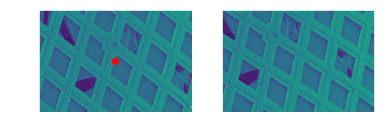

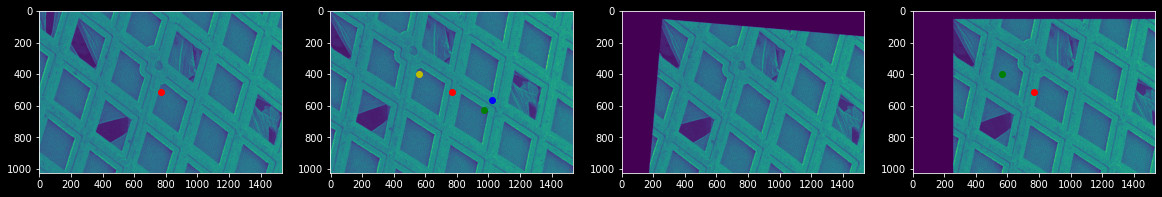

In [7]:
import os, cv2
from sympy import *
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_230456_1.0deg_360_300um_MovementTestAligned')
#folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220926_SampleDataRotation\final\220926_140948_1.0deg_360_MovementTestAligned')

pos_file = Path.joinpath(folder, 'position_data.csv')

#plot_position_data(file)
files = []
for file in os.listdir(folder):
    if file.endswith(".jpg"):# and file.startswith('raw'):
        files.append(file)
        #print(file)

fig,(ax1_0,ax2_0) = plt.subplots(1,2)
file_reference = [f for f in files if '_1.0' in f]
img_reference = cv2.imread(os.path.join(folder,file_reference[0]),cv2.IMREAD_GRAYSCALE)
ax1_0.imshow(img_reference)
ax1_0.plot(img_reference.shape[1]/2, img_reference.shape[0]/2,'ro')

angle = 6.0
file_alignment = [f for f in files if '_'+ str(angle) in f]
img_alignment = cv2.imread(os.path.join(folder,file_alignment[0]), cv2.IMREAD_GRAYSCALE)
c = 0.0
crop = []
crop.append(int(np.round(img_alignment.shape[0]*c)))
crop.append(int(np.round(img_alignment.shape[1]*c)))
print(crop)
print(crop[1],img_alignment.shape[1]-crop[1],crop[0],img_alignment.shape[0]-crop[0])
img_alignment = img_alignment[crop[0]:img_alignment.shape[0]-crop[0],crop[1]:img_alignment.shape[1]-crop[1]].copy()
ax2_0.imshow(img_alignment)
#ax2_0.plot(img_alignment.shape[1]/2, img_alignment.shape[0]/2,'ro')

def detect_and_plot(image, axes,N_FEATURES=2000):
    orb = cv2.ORB_create(nfeatures=N_FEATURES)
    kp, des = orb.detectAndCompute(image, None)
    kp_img = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
    axes.imshow(kp_img)

def matchFeatures(img_to_align, img_reference, MIN_MATCHES=50, N_FEATURES=5000,DIST_THRES=0.7,VERBOSE=False, DISPLAY_MATCHES=False):
    orb = cv2.ORB_create(nfeatures=N_FEATURES)
    kp1, des1 = orb.detectAndCompute(img_to_align, None)
    kp2, des2 = orb.detectAndCompute(img_reference, None)

    index_params = dict(algorithm=6,
                        table_number=6,
                        key_size=12,
                        multi_probe_level=2)
    search_params = {}
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # As per Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < DIST_THRES * n.distance:
            good_matches.append(m)

    if len(good_matches) > MIN_MATCHES:
        src_points = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        mat, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 10.0)
        corrected_img = cv2.warpPerspective(img_to_align, mat, (img_reference.shape[1], img_reference.shape[0]))
        if DISPLAY_MATCHES:            
            match_img = cv2.drawMatches(img_to_align, kp1, img_reference, kp2, good_matches[:50], None)
            f, ax = plt.subplots(figsize=(16,9))
            ax.imshow(match_img)
            plt.show()
        if VERBOSE:
            print('Matching successful')
        return corrected_img, mat.copy()
    elif DIST_THRES < 0.95: 
        if VERBOSE:       
            print('Matching failed, trying to enlarge threshold for good matches.({})'.format(DIST_THRES+0.1))
        corrected_img, mat = matchFeatures(img_to_align, img_reference, DIST_THRES=DIST_THRES+0.1, DISPLAY_MATCHES=True)
        return corrected_img, mat.copy()
    else:
        if VERBOSE:
            print('Matching failed')
        return None, None
def get_pixel_size(img:np.ndarray,HFW:float)-> float:
    return HFW/img.shape[1]
def get_params_from_transformation_matrix(m, pixel_size=0.0, PRINT=False):
    if np.abs(m[2,0]) > 1e-3 or np.abs(m[2,1]) > 1e-3 :
        print("This is no valid transformation matrix, the projection component is too large.")
        return None
    else:
        a,b,c,d = m[0,0] , m[0,1], m[1,0], m[1,1]
        result = {}
        result['t'] = [m[0,2], m[1,2]]
        sx, sy = np.sqrt(a ** 2 + c ** 2) , np.sqrt(b ** 2 + d ** 2)
        result['s']  = [sx, sy]
        phi1,phi2 = np.rad2deg(np.arctan((c/sx)/(d/sy))), np.rad2deg(np.arctan((-b/sy)/(a/sx)))
        result['phi']  = [phi1,phi2, np.mean([phi1,phi2])]
        result['t_meter'] =[ t * pixel_size for t in result['t']]     
        tx , ty = symbols('x,y')
        a = result['phi'][2]
        Eq1 = Eq((np.cos(a) * tx) - (ty * np.sin(a)) - transformationMatrix[0][2],0)
        Eq2 = Eq((tx * np.sin(a)) + (np.cos(a) * ty) - transformationMatrix[1][2],0)
        solution = solve((Eq1,Eq2), (tx, ty))
        result['c_x'], result['c_y'] = solution[tx], solution[ty] 
        #print(solution)

        if PRINT:                        
            print("---Image Transformation---")
            print("{}\n".format(m))
            if pixel_size > 0.0:         
                print("Translation (x,y) / mm: {:.2f}, {:.2f}".format(m[0,2]*1e3*pixel_size,m[1,2]*1e3*pixel_size))
            print("Translation (x,y) / px: {}, {}".format(m[0,2],m[1,2]))
            print("Scaling (x,y): {}, {}".format(result['s'][0], result['s'][1]))
            print("Rotation Angle (x,y, mean): {}, {}, {}".format(phi1,phi2 ,round(result['phi'][2],2)))                      
            print("Center of rotation / mm: {}, {}".format(result['c_x'],result['c_y']))
        return result        


#fig, axes = plt.subplots(1,2)
#detect_and_plot(img_reference,axes[0])
#detect_and_plot(img_alignment, axes[1])
corrected_img, transformationMatrix = [], []
corrected_img, transformationMatrix = matchFeatures(img_reference=img_reference, img_to_align= img_alignment, DISPLAY_MATCHES=False)

params = get_params_from_transformation_matrix(transformationMatrix,pixel_size=300e-6/1520, PRINT=True)
x,y,rot_center = [],[],[]
for i in range(2):    
    corrected_img, transformationMatrix = [], []
    corrected_img, transformationMatrix = matchFeatures(img_reference=img_reference, img_to_align= img_alignment, DISPLAY_MATCHES=False)
    params = get_params_from_transformation_matrix(transformationMatrix, PRINT=False)
    rot_center.append(params['phi'][2])
    x.append(params['t'][0])    
    y.append(params['t'][1])
    #x.append(params['c_x'])
    #y.append(params['c_y'])

#print(rot_center)
rot_mean = np.mean(rot_center)
x_mean, y_mean = np.mean(x),np.mean(y)#*np.arcsin(np.deg2rad(rot_mean))
x_relative, y_relative = x_mean + img_alignment.shape[1]/2, y_mean + img_alignment.shape[0]/2
x_rel_mirr, y_rel_mirr = -x_mean + img_alignment.shape[1]/2, -y_mean + img_alignment.shape[0]/2
image_center = np.array([img_alignment.shape[1]/2, img_alignment.shape[0]/2,1])
image_center_new = np.dot(transformationMatrix[:2],image_center)
image_center_mirrored = 2*image_center[:2] - image_center_new


print("Mean rotation: {:.2f}".format(rot_mean))
print("Mean offset relative: {} {}".format(x_relative,y_relative))
print("Mean offset: {} {}".format(x_mean, y_mean))


plt.style.use('dark_background')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
fig.set_size_inches(20,10)
ax1.imshow(img_reference)
ax1.plot(img_alignment.shape[1]/2, img_alignment.shape[0]/2,'ro')
ax2.imshow(img_alignment)
ax2.plot(img_alignment.shape[1]/2, img_alignment.shape[0]/2,'ro')
ax2.plot(x_relative,y_relative,'bo')
ax2.plot(image_center_mirrored[0],image_center_mirrored[1],'yo')
ax2.plot(image_center_new[0], image_center_new[1] ,'go')
ax3.imshow(corrected_img)
ax3.set_xlim(0,img_reference.shape[1])
ax3.set_ylim(0,img_reference.shape[0])
ax3.invert_yaxis()
#ax3.plot(image_center_mirrored[0],image_center_mirrored[1],'yo')
#ax3.plot(image_center_new[0], image_center_new[1] ,'go')
#ax3.plot(img_alignment.shape[1]/2, img_alignment.shape[0]/2,'ro')
a = np.array([img_alignment.shape[1]/2, img_alignment.shape[0]/2,1 ])
new = np.dot(transformationMatrix[0:2][0:3],a)
ax4.plot(img_alignment.shape[1]/2-(new[0]-img_alignment.shape[1]/2),img_alignment.shape[0]/2-(new[1]- img_alignment.shape[0]/2),'go')

#M = np.float32([[1,0,new[0]-img_alignment.shape[1]/2],[0,1,new[1]-img_alignment.shape[0]/2]])
rot_mat = cv2.getRotationMatrix2D(center=(float(params['c_x']),float(params['c_y'])),angle=-rot_mean, scale=1.0)
M = np.float32([[1,0,params['t'][0]],[0,1,params['t'][1]]])
#M = np.float32([[1,0,image_center_new[0]-image_center[0]],[0,1,image_center_new[1]-image_center[1]]])
#dst = cv2.warpAffine(img_alignment,rot_mat,(img_alignment.shape[1],img_alignment.shape[0]))
dst = cv2.warpAffine(img_alignment,M,(img_reference.shape[1],img_reference.shape[0]))
ax4.imshow(dst)
ax4.plot(img_alignment.shape[1]/2, img_alignment.shape[0]/2,'ro')

ax4.set_xlim(0,img_reference.shape[1])
ax4.set_ylim(0,img_reference.shape[0])
ax4.invert_yaxis()




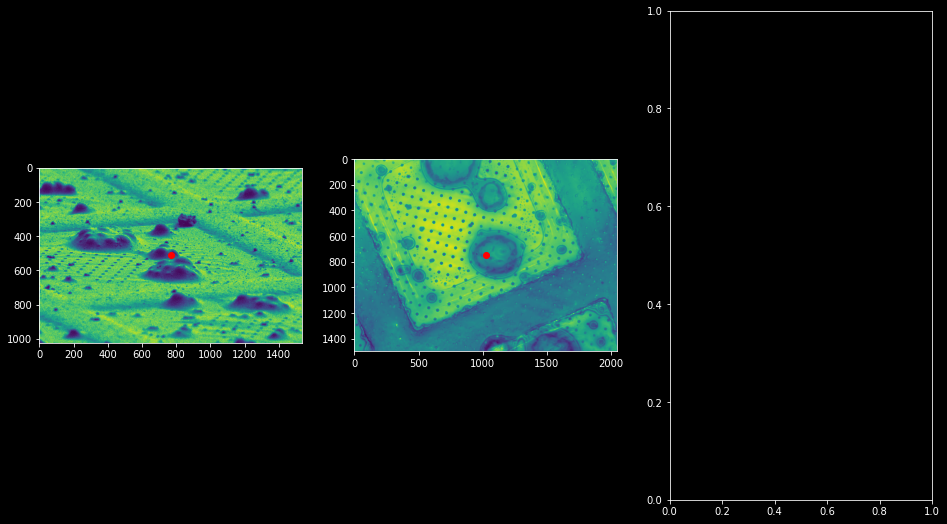

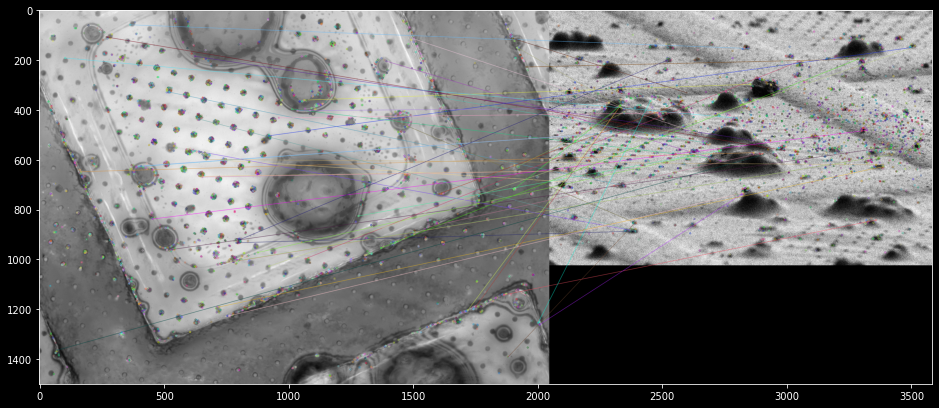

[[-3.56585782e-01  4.81170614e-01  3.46384178e+02]
 [-9.25311019e-01  1.21868790e+00  9.04312158e+02]
 [-1.02748733e-03  1.39485838e-03  1.00000000e+00]]


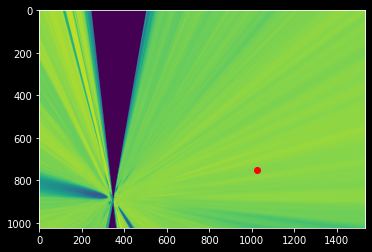

In [8]:
from pathlib import Path
import cv2, os

import numpy as np
import matplotlib.pyplot as plt

folder_FIB = Path('\\\\samba-pool-plitzko2.biochem.mpg.de\\pool-plitzko2\\Sven\\MachineLearning\Development_correlation\\FIB')
#plot_position_data(file)
files_FIB = []
for file in os.listdir(folder_FIB):
    if file.endswith(".tif"):# and file.startswith('raw'):
        files_FIB.append(file)
        #print(file)

file_FIB_reference = [f for f in files_FIB if '_104_' in f]
img_FIB_reference = cv2.imread(os.path.join(folder_FIB,file_FIB_reference[0]),cv2.IMREAD_GRAYSCALE)


folder_iFLM = Path('\\\\samba-pool-plitzko2.biochem.mpg.de\\pool-plitzko2\\Sven\\MachineLearning\Development_correlation\\TestImages')
#plot_position_data(file)
files_iFLM = []
for file in os.listdir(folder_iFLM):
    if file.endswith(".tif"):# and file.startswith('raw'):
        files_iFLM.append(file)
        #print(file)

file_iFLM_reference = [f for f in files_iFLM if '_EDF_' in f]
img_iFLM_reference = cv2.imread(os.path.join(folder_iFLM,file_iFLM_reference[0]),cv2.IMREAD_GRAYSCALE)


fig,(ax1_0,ax2_0, ax3_0) = plt.subplots(1,3, figsize=(16,9 ))
ax1_0.imshow(img_FIB_reference)
ax1_0.plot(img_FIB_reference.shape[1]/2, img_FIB_reference.shape[0]/2,'ro')

ax2_0.imshow(img_iFLM_reference)
ax2_0.plot(img_iFLM_reference.shape[1]/2, img_iFLM_reference.shape[0]/2,'ro')


#fig, axes = plt.subplots(1,2)
#detect_and_plot(img_reference,axes[0])
#detect_and_plot(img_alignment, axes[1])
corrected_img, transformationMatrix = [], []
corrected_img, transformationMatrix = matchFeatures(img_reference=img_FIB_reference, img_to_align= img_iFLM_reference, \
    DIST_THRES=0.7, N_FEATURES=10000,MIN_MATCHES=100, DISPLAY_MATCHES=True)

print(transformationMatrix)

fig, ax = plt.subplots(1,1)
ax.imshow(corrected_img)
ax.plot(img_iFLM_reference.shape[1]/2, img_iFLM_reference.shape[0]/2,'ro')


#params = get_params_from_transformation_matrix(transformationMatrix, PRINT=True)
#rot_center = (params['phi'][2])
#x = (params['t'][0])    
#y = (params['t'][1])


In [9]:
import math

img1 = img_iFLM_reference         # queryImage
img2 = img_FIB_reference # trainImage
# change size of image
scale_percent = 100 
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img1, dim, interpolation = cv2.INTER_LINEAR)


#2d to 3d (projection)  , and -> rotation point - center point (origin point)
proj2dto3d = np.array([[1,0,-img.shape[1]/2],
                      [0,1,-img.shape[0]/2],
                      [0,0,0],
                      [0,0,1]],np.float32)

# 3d matrixs in  x ,y ,z 

'''
 you can remove any matrix if you dont want to rotate around it , so in our case 
 we rotate around y axis only so any line ends with " #0 " we can remove it 
 and the programe will run 

'''
rx   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)  #0
'''
#ry   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)

#rz   = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]],np.float32)  #0
'''

trans= np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,30],   #400 to move the image in z axis 
                 [0,0,0,1]],np.float32)


proj3dto2d = np.array([ [200,0,img.shape[1]/2,0],
                        [0,200,img.shape[0]/2,0],
                        [0,0,1,0] ],np.float32)

x =-1.0 #0
y =0.0
z =0.0 #0

#cv2.imshow("img",img1)


ax = float(x * (math.pi / 180.0)) #0
ay = float(y * (math.pi / 180.0)) 
az = float(z * (math.pi / 180.0)) #0

rx[1,1] = math.cos(ax) #0
rx[1,2] = -math.sin(ax) #0
rx[2,1] = math.sin(ax) #0
rx[2,2] = math.cos(ax) #0

#ry[0,0] = math.cos(ay)
#ry[0,2] = -math.sin(ay)
#ry[2,0] = math.sin(ay)
#ry[2,2] = math.cos(ay)

#rz[0,0] = math.cos(az) #0
#rz[0,1] = -math.sin(az) #0
#rz[1,0] = math.sin(az) #0
#rz[1,1] = math.cos(az) #0

r =rx.dot(ry).dot(rz) # if we remove the lines we put    r=ry
final = proj3dto2d.dot(trans.dot(r.dot(proj2dto3d)))


dst = cv2.warpPerspective(img, final,(img.shape[1],img.shape[0]),None,cv2.INTER_LINEAR
                        ,cv2.BORDER_CONSTANT,(255,255,255))

plt.imshow(dst)

NameError: name 'ry' is not defined

In [ ]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.75000000e+02 -5.11133975e+02 -5.00000000e-01]
 [ 6.49519053e+02  8.87310013e+02  8.66025404e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3168: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 3 && M0.cols == 3 in function 'cv::warpPerspective'


3.0
13.0
23.0
33.0
43.0
53.0
63.0
73.0
83.0
93.0
103.0
113.0
123.0
133.0
143.0
153.0
163.0
173.0
183.0
193.0
203.0
213.0
223.0
233.0
243.0
253.0
263.0
273.0
283.0
293.0
303.0


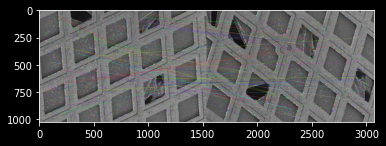

313.0
323.0
333.0
343.0
353.0


In [ ]:
image_center = np.array([img_alignment.shape[1]/2, img_alignment.shape[0]/2,1])
image_center_mirrored, rot_center, params = [],[],[]
for ang in np.arange(3.0,359.0,10.0):
    file_alignment = [f for f in files if '_'+ str(ang) in f]
    img_alignment = cv2.imread(os.path.join(folder,file_alignment[0]), cv2.IMREAD_GRAYSCALE)    
    for i in range(1):    
        corrected_img, transformationMatrix = [], []
        corrected_img, transformationMatrix = matchFeatures(img_reference=img_reference, img_to_align= img_alignment, DISPLAY_MATCHES=False)
        #params = get_params_from_transformation_matrix(transformationMatrix, PRINT=False)
    params.append(get_params_from_transformation_matrix(transformationMatrix,pixel_size=get_pixel_size(img_reference,300e-6), PRINT=False))
    rot_center.append(params[-1]['phi'][2])
    image_center_new = np.dot(transformationMatrix[:2],image_center)
    image_center_mirrored.append(2*image_center[:2] - image_center_new)
    print(ang)

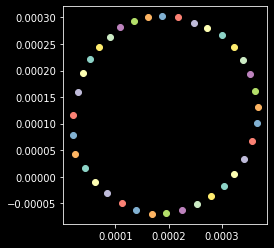

In [ ]:
fig, ax = plt.subplots()
##print(params)
#ax.plot(image_center_mirrored[0][0], image_center_mirrored[0][1], 'go')
x,y = [],[]
for _ in range(len(params)):
    x.append(params[_]['t_meter'][0])   
    y.append(params[_]['t_meter'][1])
    ax.plot(params[_]['t_meter'][0], params[_]['t_meter'][1],'o')
    #ax.plot(solution[_][0][0],solution[_][0][1], 'x')
    #ax.plot(solution[_][1][0],solution[_][1][1], 'x')
#print(rot_center)
#print(image_center_mirrored[0][0])
##print(solution[2][0][0])
ax.set_aspect('equal')

Center / mm: 0.19140729595073394,0.11742607011581822
Radius / mm: 0.17964433437438115
Residuum: 9.42765305298837e-10


Text(0, 0.5, 'Translation in y / mm')

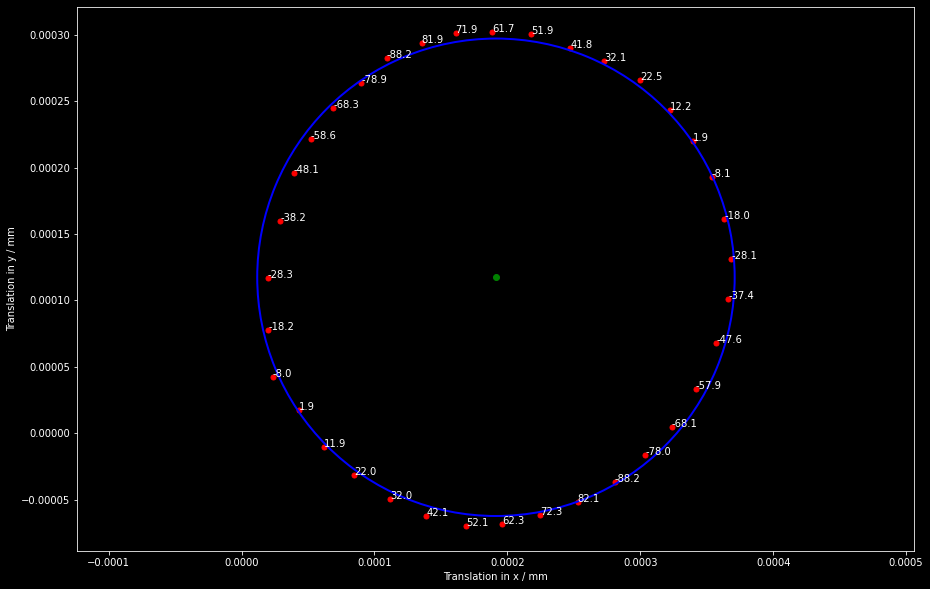

In [ ]:
result_lsq_test = calculate_center_lsq(x,y)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x, y,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(rot_center):
    ax.annotate(str(round(txt,1)), (x[i], y[i]))

ellipse = arc(xy=(result_lsq_test['xc'],result_lsq_test['yc']), width=2*result_lsq_test['r'], height=2*result_lsq_test['r'],
                edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_test['xc'],result_lsq_test['yc'], 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

#angle = -72
#x_t2, y_t2 = result_lsq_test['r'] * np.cos(np.deg2rad(angle)), result_lsq_test['r'] * np.sin(np.deg2rad(angle))
#ax.plot(x_t2, y_t2 , 'yo')
#ax.annotate(str(angle), (x_t2, y_t2))
#ax.set_xlim(0,1000)
#ax.set_ylim(-500,500)

In [ ]:
def fit_ellipse(x, y):
    """

    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.


    """

    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    return np.concatenate((ak, T @ ak)).ravel()


def cart_to_pol(coeffs):
    """

    Convert the cartesian conic coefficients, (a, b, c, d, e, f), to the
    ellipse parameters, where F(x, y) = ax^2 + bxy + cy^2 + dx + ey + f = 0.
    The returned parameters are x0, y0, ap, bp, e, phi, where (x0, y0) is the
    ellipse centre; (ap, bp) are the semi-major and semi-minor axes,
    respectively; e is the eccentricity; and phi is the rotation of the semi-
    major axis from the x-axis.

    """

    # We use the formulas from https://mathworld.wolfram.com/Ellipse.html
    # which assumes a cartesian form ax^2 + 2bxy + cy^2 + 2dx + 2fy + g = 0.
    # Therefore, rename and scale b, d and f appropriately.
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi


def get_ellipse_pts(params, npts=100, tmin=0, tmax=2*np.pi):
    """
    Return npts points on the ellipse described by the params = x0, y0, ap,
    bp, e, phi for values of the parametric variable t between tmin and tmax.

    """

    x0, y0, ap, bp, e, phi = params
    # A grid of the parametric variable, t.
    t = np.linspace(tmin, tmax, npts)
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    return x, y

'''
# Test the algorithm with an example elliptical arc.
npts = 250
tmin, tmax = np.pi/6, 4 * np.pi/3
x0, y0 = 4, -3.5
ap, bp = 7, 3
phi = np.pi / 4
# Get some points on the ellipse (no need to specify the eccentricity).
x, y = get_ellipse_pts((x0, y0, ap, bp, None, phi), npts, tmin, tmax)
noise = 0.1
x += noise * np.random.normal(size=npts) 
y += noise * np.random.normal(size=npts)
'''
coeffs = fit_ellipse(np.array(x), np.array(y))
print('Fitted parameters:')
print('a, b, c, d, e, f =', coeffs)
x0, y0, ap, bp, e, phi = cart_to_pol(coeffs)
print('x0, y0, ap, bp, e, phi = ', x0, y0, ap, bp, e, phi)


plt.gcf().set_size_inches(12,9)
plt.plot(x, y, 'rx')     # given points
for i, txt in enumerate(rot_center):
    plt.gca().annotate(str(round(txt,1)), (x[i], y[i]))
x, y = get_ellipse_pts((x0, y0, ap, bp, e, phi))
plt.plot(x, y,'b')
plt.gca().axis('equal')
plt.show()

TypeError: len() of unsized object

In [ ]:
'''
cx , cy = symbols('x,y')
radius, solution = [],[]
print(len(image_center_mirrored))
for i in range(len(image_center_mirrored)):
    delta_center = np.array(params[i]['t'][:2])
    radius.append(np.sqrt(delta_center.dot(delta_center)) / (2*np.sin(np.deg2rad(rot_center[i]/2))))
    Eq1 = Eq((0-cx)**2 + (0-cy)**2 - radius[i]**2,0)
    Eq2 = Eq((params[i]['t'][0]-cx)**2 + (params[i]['t'][1]-cy)**2 - radius[i]**2,0)
    solution.append(solve((Eq1,Eq2), (cx,cy)))
    print(i)
    #print(radius)
    #print(solution)
    '''
    

16
0


KeyboardInterrupt: 

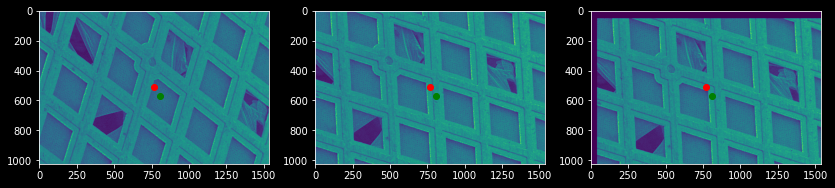

In [ ]:
image_center = np.array([img_alignment.shape[1]/2, img_alignment.shape[0]/2, 1 ])
translation_ini = np.array([params['t'][0],params['t'][1],1])

rot_mat = cv2.getRotationMatrix2D(center=(float(params['c_x']),float(params['c_y'])),angle=-rot_mean, scale=1.0)
M = np.float32([[1,0,params['t'][0]],[0,1,params['t'][1]]])
rotated_center = np.dot(rot_mat,image_center)
rotated_center = np.append(rotated_center,1)
translation = np.dot(M,rotated_center)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14, 6))


ax1.imshow(img_reference)
ax1.plot(image_center[0],image_center[1],'ro')
ax1.plot(translation[0],translation[1],'go')

ax2.imshow(img_alignment)
ax2.plot(image_center[0],image_center[1],'ro')
ax2.plot(translation[0],translation[1],'go')


M = np.float32([[1,0,translation[0]-image_center[0]],[0,1,translation[1]-image_center[1]]])
dst = cv2.warpAffine(img_alignment,M,(img_alignment.shape[1],img_alignment.shape[0]))
ax3.imshow(dst)
ax3.plot(image_center[0],image_center[1],'ro')
ax3.plot(translation[0],translation[1],'go')

